# Desarrollo del software de anclajes

## Importar librerías

In [47]:
from    tkinter             import *
from    tkinter             import ttk , messagebox
import  tkinter             as tk
import  matplotlib.pyplot   as plt
from    matplotlib.backends.backend_tkagg import FigureCanvasTkAgg , NavigationToolbar2Tk #Realizar gráficos en tkinter con la librería plt
from    PIL                 import ImageTk, Image # Cargar imagenes a la ventana
import  numpy               as np
from    math                import *
from tkinter.font import Font
from scipy.stats import linregress
import sqlite3
import os 
import sys
from tktooltip import ToolTip

## Iniciar ventana

In [48]:
root = Tk() #Crea la ventana de la aplicación, esto importante en caso de crear más de una ventana

## Diseño de ventana

In [49]:
root.title("Anclajes V.01")
frm = ttk.Frame(root , relief=SOLID) #Crea un recuadro
frm.grid(row=0, column=0) #Al recuadro se da formato grilla

## Font

In [50]:
# Font of the titles
font_title      = Font(weight="bold" , size=11 , family='Ubuntu' ,underline=True)

# Font of the labels
font_label      = Font(weight='bold', size=9 , family='Ubuntu') 

## Datos iniciales

In [51]:
Label_id_anclaje          = Label(frm, text="ID Anclaje" , font=font_label).grid(column=0 , row= 0)         
Entry_id_anclaje          = ttk.Combobox(frm , justify='center')
Entry_id_anclaje.grid(column=1 , row= 0)

Label_Nivel                   = Label(frm, text="Nivel" , font=font_label).grid(column=0 , row= 1)
Entry_nivel                   = Entry(frm, justify='center')
Entry_nivel.grid(column=1 , row= 1)

## CAT
Label_gato                    = Label(frm, text="Tipo de Gato" , font=font_label).grid(column=2 , row= 0)         

area_gato = DoubleVar()
Label_area_gato               = Label(frm, text="Área de gato [cm2]" , font=font_label).grid(column=2 , row= 1)         
Entry_area_gato               = Entry(frm, textvariable=area_gato , justify='center')
Entry_area_gato.grid(column=3 , row= 1)

# Lista desplegable
def lista_gatos(event):
    selected_item = combo_box_area_gato.get()
    if selected_item == "K200":
        area_gato.set(314.0)
    elif selected_item == "K60":
        area_gato.set(100.0)
    elif selected_item == "K20":
        area_gato.set(86.0)
    else:
        area_gato.set(0.0)

# Crear la primera lista desplegable
combo_box_area_gato            = ttk.Combobox(frm,textvariable="Tipo de gato" ,values=["K20", "K60", "K200" , "User define"] , justify='center')
combo_box_area_gato.bind("<<ComboboxSelected>>", lista_gatos)
combo_box_area_gato.option_add('*TCombobox*Listbox.Justify', 'center')
combo_box_area_gato.grid(column=3 , row= 0)


Division                      = DoubleVar()
Division.set(0.01)
Label_Division                = Label(frm, text='Div.Instrumento' , font=font_label).grid(column=4 , row=0)
Entry_Division                = Entry(frm, textvariable=Division , justify='center')
Entry_Division.grid(column=5 , row=0)

Label_Fecha                   = Label(frm, text='Fecha' , font=font_label).grid(column=4 , row=1)
Entry_Fecha                   = Entry(frm , justify='center')
Entry_Fecha.grid(column=5 , row=1)

Percentage_load_step          = [0.15 , 0.25 , 0.50 , 0.75 , 0.95 , 1.00]
Percentage_creep_step         = [1.00 , 1.00 , 1.00 , 1.00 , 1.00]            
Percentage_download_step      = [0.85 , 0.75 , 0.65 , 0.50]
Percentage_reload_step        = [0.65 , 0.75 , 0.85 , 1.00]
Percentage_lockoff_step       = [0.95 , 0.80 , 0.70 , 0.50 , 0.30]

Label_Step                    = Label(frm, text='Escalón de carga' , font=font_label).grid(column=0 , row=10) # Etiqueta de la columna Porcentaje
Label_Presion                 = Label(frm, text='Presión [bar]' , font=font_label).grid(column=1 , row=10)    # Etiqueta de la columna Presión
Label_Lectura                 = Label(frm, text='Lectura' , font=font_label).grid(column=2 , row=10)          # Etiqueta de la columna Lectura
Label_Carga                   = Label(frm, text='Carga [kN]' , font=font_label).grid(column=3 , row=10)       # Etiqueta de la columna Carga
Label_Deformacion             = Label(frm, text='Deformación [mm]' , font=font_label).grid(column=4 , row=10) # Etiqueta de la columna Deformación

Label_Test_coefficient        = Label(frm, text="Coeficiente de ensayo" , font=font_label).grid(column=6, row=0)
Test_coefficient              = DoubleVar()
Test_coefficient.set(1.2)                                                                   # We assign an initial reference value
Entry_Test_coefficient        = Entry(frm , textvariable = Test_coefficient , justify='center')
Entry_Test_coefficient.grid(column=7, row=0) 

Label_Carga_servicio          = Label(frm, text="Carga de Servicio [kN]" , font=font_label).grid(column=6, row=1)
Carga_servicio                = DoubleVar() # Asigna el tipo de dato
Entry_Carga_servicio          = Entry(frm , textvariable = Carga_servicio , justify='center') # Escribir así la entrada porque sino despues  
Entry_Carga_servicio.grid(column=7, row=1)                                                  # no se puede aplicar la función .get()

Label_Test_load               = Label(frm , text="Carga de ensayo [kN]" , font=font_label , justify='center').grid(column=6, row=2)
Test_load                     = DoubleVar()
Entry_Test_load               = Entry(frm , textvariable = Test_load , justify='center')
Entry_Test_load.grid(column=7, row=2)

## Logo SRK

In [52]:
# Ruta relativa
# Obtén la ruta del directorio del script actual
##script_directory = os.path.dirname(sys.argv[0])

# Construye la ruta relativa a la imagen
##image_path = os.path.join(script_directory, "logo_srk.png")
##imagen_srk = Image.open(image_path)

##imagen_srk      = imagen_srk.resize((90,30))  # Cambiar el tamaño si es necesario
##imagen_srk_tk   = ImageTk.PhotoImage(imagen_srk)

# Ruta total
# Cargar la imagen
imagen_srk      = Image.open(r"C:\Users\jjeri\OneDrive - SRK Consulting\SRK!\TKINTER\Anchors\logo_srk.png")
imagen_srk      = imagen_srk.resize((150,30))  # Cambiar el tamaño si es necesario
imagen_srk_tk   = ImageTk.PhotoImage(imagen_srk)

# Crear una etiqueta para mostrar la imagen
label_imagen_srk = Label(frm, image=imagen_srk_tk) 
label_imagen_srk.grid(column=8, row=0, columnspan=7, rowspan=2)

## Anchor data

In [53]:
# Definir la clase a las variables
LL                      = DoubleVar()
LB                      = DoubleVar()
Drilling_diameter       = DoubleVar()
LC                      = DoubleVar()

#Title of the anchors
title_anchors  = Label(frm, text="Datos del anclaje", font=font_title).grid(column=0,row= 3, columnspan=2)

Label_LL                = Label(frm, text="Longitud libre [m]" , justify='left' , font=font_label).grid(column=0,row= 4)
Entry_LL                = Entry(frm, textvariable=LL , justify='center')
Entry_LL.grid(column=1,row= 4)

Label_LB                = Label(frm, text="Longitud de bulbo [m]" , justify='left' , font=font_label).grid(column=0,row= 5)
Entry_LB                = Entry(frm, textvariable=LB , justify='center')
Entry_LB.grid(column=1,row=5)

Label_LC                = Label(frm, text="Longitud chicote [m]" , justify='left' , font=font_label).grid(column=0,row= 6)
Entry_LC                = Entry(frm, textvariable=LC , justify='center')
Entry_LC.grid(column=1,row=6)

Label_diametro_anclaje  = Label(frm, text= "Diámetro perforación [m]" , justify='left' , font=font_label).grid(column=0 , row= 7)         
Entry_diametro_anclaje  = Entry(frm , justify='center' , textvariable= Drilling_diameter)
Entry_diametro_anclaje.grid(column=1 , row= 7)

## Cable data

In [54]:
steel_data               = StringVar()
Area_steel_total         = DoubleVar()
Modulus_elasticity       = DoubleVar()
Modulus_elasticity.set(200000)

#Title of the cable
title_cable  = Label(frm, text="Datos de cables", font=font_title).grid(column=4,row= 3, columnspan=2)

Label_steel_data         = Label(frm, text="Marca y modelo" , justify='left' , font=font_label).grid(column=4,row= 4)
Entry_steel_data         = Entry(frm, textvariable=steel_data , justify='center')
Entry_steel_data.grid(column=5,row= 4)

Label_Area_steel_total   = Label(frm, text="Área de acero [cm2]" , justify='left' , font=font_label).grid(column=4,row= 5)
Entry_Area_steel_total   = Entry(frm, textvariable=Area_steel_total , justify='center')
Entry_Area_steel_total.grid(column=5,row= 5)

Label_Modulus_elasticity   = Label(frm, text="Modulo de elasticidad [MPa]" , justify='left' , font=font_label).grid(column=4,row= 6)
Entry_Modulus_elasticity   = Entry(frm, textvariable=Modulus_elasticity , justify='center')
Entry_Modulus_elasticity.grid(column=5,row= 6)

## Entry of step

In [55]:
# The class for creating entry variables and labels

class step:
    def __init__(self, percentage, initial_column , initial_row , overshadow):
        self.percentage         = percentage
        self.initial_column     = initial_column
        self.initial_row        = initial_row
        self.overshadow         = overshadow
  
    def step(self,frm):
        Val_Carga       = []
        Val_Lect        = []
        Val_Presion     = []
        Val_Deformation = []
        Labels          = []
        for i in range(len(self.percentage)):
            Aux_Carga = Label(frm, text="-")
            Aux_Carga.grid(column=self.initial_column+3, row=self.initial_row+i)
            Val_Carga.append(Aux_Carga)       
                
            Aux       = DoubleVar()
            Aux_Lect  = Entry(frm, textvariable=Aux , justify='center' , fg='blue')
            Aux_Lect.grid(column=self.initial_column+2 , row=self.initial_row+i)
            Val_Lect.append(Aux_Lect)
    
            porcentaje = self.percentage[i] * 100
            label     = Label(frm,text=f"{porcentaje}%" , bg=self.overshadow) # La etiqueta esta en función de los datos del vector Percentage_load_stage
            label.grid(column=self.initial_column , row=self.initial_row+i)
            Labels.append(label)

            Aux_1     = DoubleVar()
            Aux_Presion = Entry(frm, textvariable=Aux_1 , justify='center' , fg='black')         
            Aux_Presion.grid(column=self.initial_column+1, row=self.initial_row+i)
            Val_Presion.append(Aux_Presion)
    
            Aux_Deformation = Label(frm, text="-")
            Aux_Deformation.grid(column=self.initial_column+4, row=self.initial_row+i)
            Val_Deformation.append(Aux_Deformation)   
           
        return Val_Carga , Val_Lect , Val_Presion , Val_Deformation , Labels

In [56]:
base_row = 11
load_step           = step(percentage=Percentage_load_step      , initial_column=0 , initial_row=base_row          , overshadow='#74e78f')
base_row_creep      = base_row + len(Percentage_load_step) 
creep_step          = step(percentage=Percentage_creep_step     , initial_column=0 , initial_row=base_row_creep    , overshadow='#e2785c')
base_row_download   = base_row_creep + len(Percentage_creep_step)
download_step       = step(percentage=Percentage_download_step  , initial_column=0 , initial_row=base_row_download , overshadow='#a5e1ed')
base_row_reload     = base_row_download + len(Percentage_download_step)
reload_step         = step(percentage=Percentage_reload_step    , initial_column=0 , initial_row=base_row_reload   , overshadow='#ddea9a')
base_row_lockoff    = base_row_reload + len(Percentage_reload_step)
lockoff_step        = step(percentage=Percentage_lockoff_step   , initial_column=0 , initial_row=base_row_lockoff   , overshadow='orange')

### Join

In [57]:
# Execute functions
Val_Carga_load_step , Val_Lect_load_step , Val_Presion_load_step , Val_Deformation_load_step , label_load_step                          = load_step.step(frm)
Val_Carga_creep_step , Val_Lect_creep_step , Val_Presion_creep_step , Val_Deformation_creep_step , label_creep_step                     = creep_step.step(frm)
Val_Carga_download_step , Val_Lect_download_step , Val_Presion_download_step , Val_Deformation_download_step , label_download_step      = download_step.step(frm)
Val_Carga_reload_step , Val_Lect_reload_step , Val_Presion_reload_step , Val_Deformation_reload_step , label_reload_step                = reload_step.step(frm)
Val_Carga_lockoff_step , Val_Lect_lockoff_step , Val_Presion_lockoff_step , Val_Deformation_lockoff_step , label_lockoff_step           = lockoff_step.step(frm)

# Joining stages
Val_Lect          = Val_Lect_load_step         + Val_Lect_creep_step        + Val_Lect_download_step        + Val_Lect_reload_step          + Val_Lect_lockoff_step
Val_Deformation   = Val_Deformation_load_step  + Val_Deformation_creep_step + Val_Deformation_download_step + Val_Deformation_reload_step   + Val_Deformation_lockoff_step
Val_Presion       = Val_Presion_load_step      + Val_Presion_creep_step     + Val_Presion_download_step     + Val_Presion_reload_step       + Val_Presion_lockoff_step
Val_Carga         = Val_Carga_load_step        + Val_Carga_creep_step       + Val_Carga_download_step       + Val_Carga_reload_step         + Val_Carga_lockoff_step
Percentage        = Percentage_load_step       + Percentage_creep_step      + Percentage_download_step      + Percentage_reload_step        + Percentage_lockoff_step
Val_label         = label_load_step            + label_creep_step           + label_download_step           + label_reload_step             + label_lockoff_step

### Get values

In [58]:
Deformation         = []
Carga               = []

def obtener_textos():
    zero = Val_Lect[0]
    for Aux_Lect , Aux_Deformation in zip(Val_Lect , Val_Deformation):
        Aux_texto_Deformation = round((float(Aux_Lect.get()) - float(zero.get())) * float(Division.get()),2) # El contenido de la etiqueta son cadenas, lo pasamos a flotante
        Aux_Deformation.config(text=Aux_texto_Deformation)
        Deformation.append(Aux_texto_Deformation)
        
    for Aux_Carga in Val_Carga:
        Aux_texto_Carga = Aux_Carga.cget("text") # .cget() extrae alguna propiedad del widget Val_carga, en este caso "text"
        Carga.append(Aux_texto_Carga)
    
    final = len(Percentage_load_step)
    Load_load_step          = Carga[:final]
    def_load_step           = Deformation[:final]

    inicio = final-1
    final = final + len(Percentage_creep_step)
    Load_creep_step         = Carga[inicio:final]
    def_creep_step          = Deformation[inicio:final]

    inicio = final-1
    final = final + len(Percentage_download_step)
    Load_download_step      = Carga[inicio:final]
    def_download_step       = Deformation[inicio:final]
    
    inicio = final-1
    final = final + len(Percentage_reload_step)
    Load_reload_step        = Carga[inicio:final]
    def_reload_step         = Deformation[inicio:final]

    inicio = final -1
    final = final + len(Percentage_lockoff_step)
    Load_lockoff_step        = Carga[inicio:final]
    def_lockoff_step         = Deformation[inicio:final]
    
    indice_inicio = next((i for i, valor in enumerate(def_lockoff_step[1:]) if valor > 0), None)

    x_lockoff = []
    pivot = []

    if indice_inicio is not None:
        slope_reload , intercept_reload , _, _ , _ = linregress(def_reload_step[-3:] , Load_reload_step[-3:])
        x_lockoff = (Load_lockoff_step[1] - intercept_reload) / slope_reload

        Deformation_Aux = []

        pivot = round(x_lockoff - (float(Val_Lect[inicio+1].get())) * float(Division.get())  ,2)
        
        for Aux_Lect, Aux_Deformation in zip(Val_Lect[inicio+1:], Val_Deformation[inicio+1:]):
            Aux_texto_Deformation = round((float(Aux_Lect.get()) - float(zero.get())) * float(Division.get()),2) # El contenido de la etiqueta son cadenas, lo pasamos a flotante      
            Aux = round(x_lockoff - (float(Val_Lect[inicio+1].get()) - float(Aux_Lect.get())) * float(Division.get())  ,2)

            # Aquí utilizamos el método config para actualizar la etiqueta Aux_Deformation
            Aux_Deformation.config(text=f"{Aux_texto_Deformation} ({Aux})")

            Deformation_Aux.append(Aux)

        Load_lockoff_step = Carga[inicio+1:]
        def_lockoff_step = Deformation_Aux

    return def_load_step , Load_load_step , Load_creep_step , def_creep_step , Load_download_step , def_download_step , Load_reload_step , def_reload_step , Load_lockoff_step , def_lockoff_step , x_lockoff , pivot

## Actualizar datos only first data

In [59]:
def actualizar_texto(evento):   #Se agregar el parametro "evento" para que sirva de vinculación entre la función y evento...
                                #... este caso presionar tecla enter    
    Test_load.set(float(Test_coefficient.get())*float(Carga_servicio.get()))

    for Aux_Carga, i , Aux_Presion in zip(Val_Carga , Percentage, Val_Presion ):
        texto = round(Test_load.get()*i , 2)                    # Obtener el texto del Entry
        Aux_Carga.config(text=texto)                            # Actualizar el texto de la Label
        texto_1 = round(texto / area_gato.get() * 100 , 1 )     # Redondear a un decimal
        Aux_Presion.delete(0,END)                               # deletes the contents of the entry
        Aux_Presion.insert(0,texto_1)                           # Insert the new value

          
# Asociar la tecla Enter con la función de actualización
Entry_Test_load.bind("<Return>", actualizar_texto)
Entry_Carga_servicio.bind("<Return>", actualizar_texto)
Entry_Test_coefficient.bind("<Return>", actualizar_texto)


'2679343362432actualizar_texto'

## Rectas límites

In [60]:
class RL_X: # Definimos el vector de desplazamiento en función del porcentaje
    def __init__(self,porcentaje):
        self.porcentaje = porcentaje

    def RL(self):
        Aux = LC.get() + LL.get()*0.90 + LB.get()*0.5*self.porcentaje 
        return Aux
                    
    def Vector_x(self):
        Aux_vector = [ Deformation[0] , ((self.RL() * (Carga[5]-Carga[0])) / (float(Modulus_elasticity.get()) * float(Area_steel_total.get()))) * 10000] # self.RL() da el valor de esa función
        return Aux_vector

## Imagen anclaje

In [61]:
# Ruta Relativa se ingreso en el código del logo
# Construye la ruta relativa a la imagen
##image_path_anclaje = os.path.join(script_directory, "anclaje.png")
##imagen_anclaje = Image.open(image_path_anclaje)

##imagen_anclaje = imagen_anclaje.resize((100,50))  # Cambiar el tamaño si es necesario
##imagen_anclaje_tk = ImageTk.PhotoImage(imagen_anclaje)

# Ruta total para que funcione el código
# Cargar la imagen
imagen_anclaje = Image.open(r"C:\Users\jjeri\OneDrive - SRK Consulting\SRK!\TKINTER\Anchors\anclaje.png")
imagen_anclaje = imagen_anclaje.resize((200,50))  # Cambiar el tamaño si es necesario
imagen_anclaje_tk = ImageTk.PhotoImage(imagen_anclaje)

# Crear una etiqueta para mostrar la imagen
label_imagen_anclaje = Label(frm, image=imagen_anclaje_tk)
label_imagen_anclaje.grid(column=2, row=4, columnspan=2, rowspan=3)

## Realizar gráfico

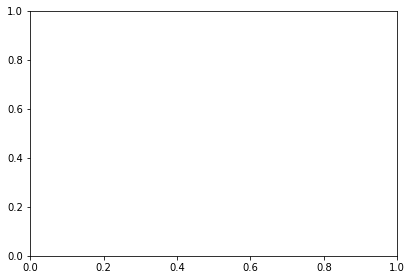

In [62]:
#Crear figura
fig, ax = plt.subplots()
plt.subplots_adjust(left=0.1, right=0.95, top=0.95, bottom=0.1)  # Ajusta los márgenes

def generar_grafico(def_load_step , Load_load_step , Load_creep_step , def_creep_step , Load_download_step , def_download_step ,
                    Load_reload_step , def_reload_step , Load_lockoff_step , def_lockoff_step): 

    ax.clear() #limpiar el gráfico, se requiere para no acumular graficos dsp de modificar los datos

    # Obtener el índice del último valor mayor o igual a cero
    max_indice_1 = next((i for i, valor in enumerate(def_load_step) if valor < 0), len(def_load_step))
    max_indice_2 = next((i for i, valor in enumerate(def_creep_step) if valor < 0), len(def_creep_step))
    max_indice_3 = next((i for i, valor in enumerate(def_download_step) if valor < 0), len(def_download_step))
    max_indice_4 = next((i for i, valor in enumerate(def_reload_step) if valor < 0), len(def_reload_step))
    max_indice_5 = next((i for i, valor in enumerate(def_lockoff_step) if valor < 0), len(def_lockoff_step))
    
    # Load curve
    ax.plot(def_load_step[:max_indice_1], Load_load_step[:max_indice_1], 'g', linewidth=1.5 , label="Carga") 
    # Creep curve
    ax.plot(def_creep_step[:max_indice_2], Load_creep_step[:max_indice_2 ], 'r', linewidth=1.5 , label="Creep")
    # Download curve
    ax.plot(def_download_step[:max_indice_3], Load_download_step[:max_indice_3 ], 'b', linewidth=1.5 , label="Descarga")
    # Reload curve
    ax.plot(def_reload_step[:max_indice_4], Load_reload_step[:max_indice_4 ], 'y', linewidth=1.5 , label="Recarga")
    # Lockoff curve
    ax.plot(def_lockoff_step[:max_indice_5], Load_lockoff_step[:max_indice_5 ], color='orange', linewidth=1.5 , linestyle='dashed' , label="Bloqueo")

    # Curvas límite 
    RL_Y = [Carga[0] , Carga[5]]
    ax.plot(RL_X(0.00).Vector_x() , RL_Y, color='gray', linewidth=1 , label='RL[0%]')
    ax.plot(RL_X(0.25).Vector_x() , RL_Y, color='gray', linewidth=1 , linestyle='dashed' , label='RL[25%]')
    ax.plot(RL_X(0.50).Vector_x() , RL_Y, color='gray', linewidth=1 , linestyle='dashed' , label='RL[50%]')
    ax.plot(RL_X(0.75).Vector_x() , RL_Y, color='gray', linewidth=1 , linestyle='dashed' , label='RL[75%]')
    ax.plot(RL_X(1.00).Vector_x() , RL_Y, color='gray', linewidth=1 , label='RL[100%]')

    def_lockoff = []

    if all(valor > 0 for valor in def_reload_step):
        slope_download , intercept_download , _, _ , _ = linregress(def_download_step[-3:] , Load_download_step[-3:])
        slope_reload , intercept_reload , _, _ , _     = linregress(def_reload_step[-3:] , Load_reload_step[-3:])

        slope_average = (slope_download + slope_reload) / 2
        intercept_average = (intercept_download + intercept_reload) / 2

        x_average = [0 , max(def_reload_step)]
        y_average = [intercept_average , max(def_reload_step)*slope_average + intercept_average]
        ax.plot(x_average, y_average , 'r', linewidth=1 , linestyle='dashed')

        # Deformación del chicote
        slope_lockoff , intercept_lockoff , _, _ , _ = linregress(def_lockoff_step[-2:] , Load_lockoff_step[-2:])
        x_projection = - intercept_lockoff / slope_lockoff

        deformation_LC = ( float(LC.get()) * Load_lockoff_step[0] * 10000) / ( float(Modulus_elasticity.get()) * float(Area_steel_total.get()) )

        def_lockoff = x_projection + deformation_LC

        ax.plot( [ x_projection , def_lockoff] , [ 0 ,0 ] , color='red', linewidth=2 , label='Def chicote')

        # Auxiliar
        ax.plot([def_lockoff_step[-1] , x_projection] , [Load_lockoff_step[-1] , 0] ,  color='orange', linewidth=1 , linestyle='dashed')

        # Intersección con la recta media descarga-recarga
        intersection = slope_average*def_lockoff + intercept_average
        ax.plot( [ def_lockoff , def_lockoff] , [ 0 ,intersection ] , color='#ab7b59' , linewidth=1.5)

        # lockoff_load
        ax.plot( [ def_lockoff , 0] , [ intersection , intersection] , color='#ab7b59' , linewidth=1.5)
        ax.annotate(round(intersection,2), (0, intersection) , weight='bold' , fontsize=12)
        
    # Configurar el gráfico
    ax.set_xlabel('Deformación [mm]')
    ax.set_ylabel('Carga [kN]')

    # Limits
    ax.set_xlim(RL_X(1.00).Vector_x()[0] , max(def_load_step[5] , RL_X(1.00).Vector_x()[1])+10)  
    ax.set_ylim(0 , Carga[5] + 50) 

    # Legend location
    ax.legend(loc='lower right' , fontsize=8)
    
    # Agregamos grid y lo configuramos
    ax.grid(color='gray', linestyle='dotted', linewidth=0.5)

    #Mostrar el gráfico
    canvas.draw()

    return def_lockoff

#Generar el marco para el gráfico
canvas = FigureCanvasTkAgg(fig, master=frm)
canvas_widget = canvas.get_tk_widget()
canvas_widget.grid(column=5, row= 11 , rowspan=20, columnspan=10)
canvas_widget.config(width=600, height=400)

toolbar = NavigationToolbar2Tk(canvas, frm , pack_toolbar=False)
toolbar.update()
toolbar.grid(row=10, column=6, columnspan=3)



## Verifications

In [63]:
#Title of the anchors
title_verifications  = Label(frm, text="Verificaciones", font=font_title).grid(column=6,row= 3, columnspan=2)

recta_limite                    = StringVar()
label_recta_limite              = Label(frm, text='Recta límite' , font=font_label).grid(column=6 , row=4)
Entry_recta_limite              = Entry(frm , textvariable=recta_limite , justify='center')
Entry_recta_limite.grid(column=7 , row=4)

creep                           = StringVar()
label_creep                     = Label(frm, text='Creep<1.5mm' , font=font_label).grid(column=6 , row=5)
Entry_creep                     = Entry(frm, textvariable=creep , justify='center')
Entry_creep.grid(column=7 , row=5)

displacement_creep_reload       = StringVar()
label_creep_reload              = Label(frm, text='ΔLcreep-recarga <1.5mm' , font=font_label).grid(column=6 , row=6)
Entry_creep_reload              = Entry(frm , textvariable=displacement_creep_reload , justify='center')
Entry_creep_reload.grid(column=7 , row=6)

friction                        = DoubleVar()
label_friction                  = Label(frm, text='Fricción [%]' , font=font_label).grid(column=6 , row=7)
Entry_friction                  = Entry(frm , textvariable=friction, justify='center')
Entry_friction.grid(column=7 , row=7)

wedge_income                    = DoubleVar()
label_wedge_income              = Label(frm, text='Ingreso de cuña [mm]' , font=font_label).grid(column=6 , row=8)
Entry_wedge_income              = Entry(frm , textvariable=wedge_income , justify='center')
Entry_wedge_income.grid(column=7 , row=8)


def verifications( def_load_step , def_creep_step , def_reload_step , Load_load_step , def_download_step , Load_download_step , Load_reload_step , def_lockoff_step , x_lockoff , def_lockoff , pivot):
    
    RL_Y = [Carga[0] , Carga[5]]
    slope_100 , _ , _, _ , _ = linregress(RL_X(0.00).Vector_x(), RL_Y)
    slope_000 , _ , _, _ , _ = linregress(RL_X(1.00).Vector_x(), RL_Y) 

    if all(valor > 0 for valor in def_load_step[1:]):
        slope_load_step , _ , _, _ , _ = linregress(def_load_step , Load_load_step)
        if slope_load_step > slope_000 and slope_load_step < slope_100:
            Entry_recta_limite.delete(0,END)
            Entry_recta_limite.insert(0 , "Verifica" )
            Entry_recta_limite.config(foreground='green')
        else:
            Entry_recta_limite.delete(0,END)
            Entry_recta_limite.insert(0 , "No Verifica" )
            Entry_recta_limite.config(foreground='red')

    if all(valor > 0 for valor in def_creep_step):
        creep = round(def_creep_step[5] - def_creep_step[2] , 2)
        if creep <= 1.5:
            Entry_creep.delete(0,END)
            Entry_creep.insert(0 , f"Verifica ({creep}mm)")
            Entry_creep.config(foreground='green')
        else:
            Entry_creep.delete(0,END)
            Entry_creep.insert(0 , f"No Verifica {creep}")
            Entry_creep.config(foreground='red')

    if all(valor > 0 for valor in def_reload_step):
        def_creep   = def_creep_step[-1]
        def_reload  = def_reload_step[-1]
        subtract = round(def_reload - def_creep , 2)

        if subtract <= 1.5:
            Entry_creep_reload.delete(0,END)
            Entry_creep_reload.insert(0 , f"Verifica ({subtract}mm)" )
            Entry_creep_reload.config(foreground='green')
        else:
            Entry_creep_reload.delete(0,END)
            Entry_creep_reload.insert(0 , f"No Verifica ({subtract}mm)" )
            Entry_creep_reload.config(foreground='red')
    
    if isinstance(pivot , np.float64): 
        if all(valor != pivot for valor in def_lockoff_step): 
        # Friction
            slope_download , intercept_download , _, _ , _ = linregress(def_download_step[-3:] , Load_download_step[-3:])
            slope_reload , intercept_reload , _, _ , _     = linregress(def_reload_step[-3:] , Load_reload_step[-3:])
            slope_average = (slope_download + slope_reload) / 2
            intercept_average = (intercept_download + intercept_reload) / 2
            Aux = def_download_step[0] * slope_download + intercept_download
            load_real = def_lockoff*slope_average + intercept_average
            friction = round(((Load_download_step[0] - Aux) / (2* load_real)) * 100 , 1)
            Entry_friction.delete(0,END)
            Entry_friction.insert(0 , friction )
            
            # Wedge income
            wedge_income = round(x_lockoff - def_lockoff , 2 )
            Entry_wedge_income.delete(0,END)
            Entry_wedge_income.insert(0 , wedge_income )
            
        else:
            pass
    else:
        pass

## Questions

In [64]:
# Ruta Relativa se ingreso en el código del logo
# Construye la ruta relativa a la imagen
##image_path_icone_question = os.path.join(script_directory, "icone-question-orange.png")
##imagen_icone_question = Image.open(image_path_icone_question)

##imagen_icone-question-orange = imagen_anclaje.resize((15,15))  # Cambiar el tamaño si es necesario
##imagen_icone-question-orange_tk = ImageTk.PhotoImage(imagen_icone-question-orange)

# Ruta total para que funcione el código
# Cargar la imagen
imagen_icone_question = Image.open(r"C:\Users\jjeri\OneDrive - SRK Consulting\SRK!\TKINTER\Anchors\icone-question-orange.png")
imagen_icone_question = imagen_icone_question.resize((15,15))  # Cambiar el tamaño si es necesario
imagen_icone_question_tk = ImageTk.PhotoImage(imagen_icone_question)

# Crear una etiqueta para mostrar la imagen
label_imagen_icone_question = Label(frm, image=imagen_icone_question_tk)

question = ["icone_1","icone_2","icone_3","icone_4","icone_5"]

answer = ["La pendiente de la curva carga debe ubicarse entre las rectas límites",
          "La deformación entre los intervalos 15' y 3' en la etapa creep debe ser menor a 1.5mm",
          "La deformación al finalizar la etapa de recarga no debe ser mayor a 1.5mm con respecto a la etapa creep",
          "Determina la perdida de carga debido a la fricción desarrollado durante la descarga y recarga del ensayo",
          "El ingreso de cuña es la deformación relativa entre el inicio del bloqueo y la deformación de la carga de bloqueo"]

for i , text in enumerate(answer):
    label_imagen_icone_question = Label(frm, image=imagen_icone_question_tk)
    label_imagen_icone_question.grid(column=8, row=4+i, sticky="w")
    ToolTip(label_imagen_icone_question, msg=text, follow=True)

## Vincular Datos y Gráfico

In [65]:
def Funciones(evento=None):
    Deformation.clear()   # Limpiar el vector Carga y Deformación para que al generar una nueva curva no quede la curva anterior
    Carga.clear()
    def_load_step , Load_load_step , Load_creep_step , def_creep_step , Load_download_step , def_download_step , Load_reload_step , def_reload_step , Load_lockoff_step , def_lockoff_step , x_lockoff , pivot= obtener_textos()  
    generar_grafico(def_load_step , Load_load_step , Load_creep_step , def_creep_step , Load_download_step , def_download_step , Load_reload_step , def_reload_step , Load_lockoff_step , def_lockoff_step)
    def_lockoff = generar_grafico(def_load_step , Load_load_step , Load_creep_step , def_creep_step , Load_download_step , def_download_step , Load_reload_step , def_reload_step , Load_lockoff_step , def_lockoff_step)
    verifications( def_load_step , def_creep_step , def_reload_step , Load_load_step , def_download_step , Load_download_step , Load_reload_step , def_lockoff_step , x_lockoff , def_lockoff , pivot)
    
def actualizar_label(entry_var, label, load):
    Test_load.set(float(Test_coefficient.get())*float(Carga_servicio.get()))
    valor = float(entry_var.get())
    resultado = round(valor / (Test_load.get()/area_gato.get()) , 1)
    label.config(text=f"{resultado}%" )
    texto = round( valor*area_gato.get() / 100 , 1)
    load.config(text=texto)

def principal(evento=None):
    actualizar_texto(evento)
    for entry, label, load in zip(Val_Presion, Val_label, Val_Carga):
        actualizar_label(entry, label, load)
    Funciones(evento)

# Asociar el evento <Return> a la función principal
for entry, lect in zip(Val_Presion , Val_Lect):
    entry.bind("<Return>", principal)
    lect.bind("<Return>", principal)


## Save Data

In [66]:
conexion = sqlite3.connect('ensayos.db') # Crea la base de datos o si ya esta creado realizará la conexión
cursor = conexion.cursor()               # El cursor es un puntero que permite navegar y ejecutar comando SQL en la base de datos
# cursor. execute crea la tabla y permite realizar operaciones en la base de datos
cursor.execute('''                       
    CREATE TABLE IF NOT EXISTS ensayos (
        nombre TEXT , -- Asegura que el nombre sea único
        fecha TEXT,
        Division REAL,
        nivel REAL,
        area_gato REAL,
        coeficiente_ensayo REAL,
        service_load REAL,
        test_load REAL,
        LL REAL,
        LB REAL,
        LC REAL,
        diameter_drillhole REAL,
        steel_data TEXT,
        Area_steel_total REAL,
        Modulus_elasticity REAL,
        recta_limite TEXT,
        creep TEXT,
        load_reload TEXT,
        friction REAL,
        cuna REAL
    )
''')
# CREATE THE COLUMNS FOR THE DATAS
Number              = []
Number_Lecture      = []
for i in range(1,25):
    Aux                 = "Pressure" + str(i)
    Aux_Lecture         = "Lecture" + str(i)
    Number.append(Aux)
    Number_Lecture.append(Aux_Lecture)
if conexion is not None:
    for columna in Number:
        try:
            # Intenta agregar la columna
            cursor.execute(f"ALTER TABLE ensayos ADD COLUMN {columna} REAL")
        except sqlite3.OperationalError as e:
            if "duplicate column name" in str(e):
                pass
            else:
                pass
    for columna in Number_Lecture:
        try:
            # Intenta agregar la columna
            cursor.execute(f"ALTER TABLE ensayos ADD COLUMN {columna} REAL")
        except sqlite3.OperationalError as e:
            if "duplicate column name" in str(e):
                pass
            else:
                pass
else:
    pass



def guardar_ensayo():   
    nombre                  = Entry_id_anclaje.get()
    fecha                   = Entry_Fecha.get()
    Division                = Entry_Division.get()
    nivel                   = Entry_nivel.get()
    area_gato               = Entry_area_gato.get()
    coeficiente_ensayo      = Entry_Test_coefficient.get()
    service_load            = Entry_Carga_servicio.get()
    test_load               = Entry_Test_load.get()
    LL                      = Entry_LL.get()
    LB                      = Entry_LB.get()
    LC                      = Entry_LC.get()
    diameter_drillhole      = Entry_diametro_anclaje.get()
    steel_data              = Entry_steel_data.get()
    Area_steel_total        = Entry_Area_steel_total.get()
    Modulus_elasticity      = Entry_Modulus_elasticity.get()
    recta_limite            = Entry_recta_limite.get()
    creep                   = Entry_creep.get()
    load_reload             = Entry_creep_reload.get()
    friction                = Entry_friction.get()
    cuna                    = Entry_wedge_income.get()

    cursor.execute("SELECT COUNT(*) FROM ensayos WHERE nombre=?", (nombre,))
    existe = cursor.fetchone()[0]

    if existe > 0:
        respuesta = messagebox.askquestion("Advertencia", "Ya existe un nombre guardado. ¿Deseas sobrescribirlo?")
        if respuesta == "yes":
            # Elimina el registro existente
            cursor.execute("DELETE FROM ensayos WHERE nombre=?", (nombre,))
        
            insertar_ensayo(cursor, nombre, fecha, Division, nivel, area_gato, coeficiente_ensayo, service_load, test_load, LL, LB, LC, diameter_drillhole, steel_data, Area_steel_total, 
                            Modulus_elasticity, recta_limite, creep , load_reload, friction, cuna)

            conexion.commit()
            actualizar_combobox_ensayos()
            messagebox.showinfo("Éxito", "Ensayo guardado con éxito.")
        else:
            messagebox.showinfo("Éxito" , "Ensayo no guardado.")
    else:
        # Realiza la inserción si no se desea sobrescribir
        insertar_ensayo(cursor, nombre, fecha, Division, nivel, area_gato, coeficiente_ensayo, service_load, test_load, LL, LB, LC, diameter_drillhole, steel_data, Area_steel_total, 
                        Modulus_elasticity,recta_limite, creep , load_reload, friction, cuna)     


        
        conexion.commit() # se utiliza en Python cuando trabajas con bases de datos para confirmar (o "commitear") los cambios realizados en la base de dato
        actualizar_combobox_ensayos()

        messagebox.showinfo("Éxito", "Ensayo guardado con éxito.")
        
def insertar_ensayo(cursor,nombre,fecha,Division,nivel,area_gato,coeficiente_ensayo,service_load,test_load,LL,LB,LC,diameter_drillhole,steel_data,Area_steel_total,
    Modulus_elasticity, recta_limite, creep , load_reload, friction, cuna):
    cursor.execute("INSERT INTO ensayos (nombre, fecha, Division, nivel, area_gato, coeficiente_ensayo , service_load , test_load , LL , LB , LC ,"
    "diameter_drillhole,steel_data,Area_steel_total,Modulus_elasticity, recta_limite, creep , load_reload, friction, cuna)"
    "VALUES (?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?)", 
    (nombre,fecha,Division,nivel,area_gato,coeficiente_ensayo,service_load,test_load,LL,LB,LC,diameter_drillhole,steel_data,Area_steel_total,Modulus_elasticity, recta_limite, creep , load_reload, friction, cuna) )
    # ensayo en el nombre del database

    # Obtengo los valores 
    Values_pressure         = [etiqueta.get() for etiqueta in Val_Presion]
    #Values_Load             = [etiqueta.cget("text") for etiqueta in Val_Carga]
    Values_Lecture          = [etiqueta.get() for etiqueta in Val_Lect]
    #Values_Displacement     = [etiqueta.cget("text") for etiqueta in Val_Deformation]


    # Actualiza la fila en la tabla
    consulta_sql_pressure = f"UPDATE ensayos SET {', '.join([f'{columna} = ?' for columna in Number])} WHERE nombre = ?"
    valores_actualizacion_pressure = Values_pressure + [nombre]
    cursor.execute(consulta_sql_pressure, valores_actualizacion_pressure)
    
    consulta_sql_lecture = f"UPDATE ensayos SET {', '.join([f'{columna} = ?' for columna in Number_Lecture])} WHERE nombre = ?"
    valores_actualizacion_lecture = Values_Lecture + [nombre]
    cursor.execute(consulta_sql_lecture, valores_actualizacion_lecture)

    conexion.commit()

    return cursor.lastrowid #Esta función devuelve el ID de la última fila insertada en la tabla. Esto es útil si necesitas obtener el ID del registro recién insertado.


def actualizar_combobox_ensayos():
    cursor.execute("SELECT nombre FROM ensayos") # Selecciona todos los valores ingresaros en la columna nombre de la base de datos ensayos
    ensayos = cursor.fetchall() # se utiliza para recuperar todos los registros de una consulta SQL ejecutada previamente en la base de datos utilizando el cursor de SQLite.
    
    ensayos_nombres = [ensayo[0] for ensayo in ensayos]
    Entry_id_anclaje['values'] = ensayos_nombres

       

def mostrar_datos_ensayo():
    seleccion = Entry_id_anclaje.get()
    cursor.execute("SELECT * FROM ensayos WHERE nombre=?" , (seleccion,))
    datos = cursor.fetchone()

    if datos:      
        Entry_id_anclaje.set(datos[0])  # Establece el nombre del ensayo en el Combobox
        
        Entry_Fecha.delete(0, tk.END)
        Entry_Fecha.insert(0, str(datos[1]))
        
        Entry_Division.delete(0, tk.END)
        Entry_Division.insert(0, str(datos[2]))

        Entry_nivel.delete(0, tk.END)
        Entry_nivel.insert(0, datos[3])

        Entry_area_gato.delete(0, tk.END)
        Entry_area_gato.insert(0, datos[4])

        Entry_Test_coefficient.delete(0, tk.END)
        Entry_Test_coefficient.insert(0, datos[5])

        Entry_Carga_servicio.delete(0, tk.END)
        Entry_Carga_servicio.insert(0, datos[6])

        Entry_Test_load.delete(0, tk.END)
        Entry_Test_load.insert(0, datos[7])

        Entry_LL.delete(0, tk.END)
        Entry_LL.insert(0, datos[8])

        Entry_LB.delete(0, tk.END)
        Entry_LB.insert(0, datos[9])

        Entry_LC.delete(0, tk.END)
        Entry_LC.insert(0, datos[10])

        Entry_diametro_anclaje.delete(0, tk.END)
        Entry_diametro_anclaje.insert(0, datos[11])

        Entry_steel_data.delete(0, tk.END)
        Entry_steel_data.insert(0, str(datos[12]))

        Entry_Area_steel_total.delete(0, tk.END)
        Entry_Area_steel_total.insert(0, datos[13])

        Entry_Modulus_elasticity.delete(0, tk.END)
        Entry_Modulus_elasticity.insert(0, datos[14])    

        inicio = 20
        final = inicio + len(Val_Presion)
        for aux, i in zip(Val_Presion,range(inicio,final)):
            aux.delete(0,tk.END)
            aux.insert(0,datos[i])

        inicio = final
        final = final + len(Val_Lect)
        for aux, i in zip(Val_Lect,range(inicio,final)):
            aux.delete(0,tk.END)
            aux.insert(0,datos[i])
               
        principal()


actualizar_combobox_ensayos()

## Summary

In [67]:
# Función para cargar y mostrar los datos de la base de datos
def resumen():
    new_root = Tk()
    Resumen = new_root
    Resumen.title("Resumen de datos relevantes")
    # Conecta a la base de datos SQLite
    conexion = sqlite3.connect("ensayos.db")
    cursor = conexion.cursor()


    # Realiza una consulta SQL para obtener todos los valores de la columna especificada
    cursor.execute("SELECT nombre, fecha, nivel, service_load , test_load,steel_data,Area_steel_total, recta_limite, creep , load_reload, friction, cuna FROM ensayos")
    datos = cursor.fetchall()

    # Crear un Treeview para mostrar los datos
    tree = ttk.Treeview(Resumen, columns=("nombre", "fecha","nivel", "service_load","test_load","steel_data","Area_steel_total", "recta_limite", "creep" , "load_reload", "friction", "cuna"), show='headings')
    tree.pack()

    tree.heading("nombre", text="Nombre")
    tree.heading("fecha", text="Fecha")
    tree.heading("nivel", text="Nivel")
    tree.heading("service_load", text="Carga de servicio [kN]")
    tree.heading("test_load", text="Carga de ensayo [kN]")
    tree.heading("steel_data", text="Cantidad de cables")
    tree.heading("Area_steel_total", text="Área total de acero [cm2]")
    tree.heading("recta_limite", text="Recta límite")
    tree.heading("creep", text="Creep [mm]")
    tree.heading("load_reload", text="Deformación creep-recarga")
    tree.heading("friction", text="Fricción [%]")
    tree.heading("cuna", text="Ingreso de cuña [mm]")

    # Width of the window
    width_screen = int(Resumen.winfo_screenwidth() / 14) # 12 is the numer of datas

    tree.column("nombre", anchor="center", width=width_screen )
    tree.column("fecha", anchor="center", width=width_screen)
    tree.column("nivel", anchor="center", width=width_screen)
    tree.column("service_load", anchor="center",width=width_screen)
    tree.column("test_load", anchor="center", width=width_screen)
    tree.column("steel_data", anchor="center", width=width_screen)
    tree.column("Area_steel_total", anchor="center" , width=width_screen)
    tree.column("recta_limite", anchor="center",width=width_screen)
    tree.column("creep", anchor="center", width=width_screen)
    tree.column("load_reload", anchor="center", width=width_screen)
    tree.column("friction", anchor="center", width=width_screen)
    tree.column("cuna", anchor="center", width=width_screen)

    # Inserta los datos en la tabla
    for dato in datos:
        tree.insert("", "end", values=dato)
        
    # Cerrar la conexión a la base de datos
    conexion.close()



## Contenido ejecutable de la Ventana

In [68]:
# Al botón le asigna el comando cerrar
#Button_1 = Button(frm, text="Cerrar", command=root.destroy).grid(column=9, row=0)

# Generar boton de grafico
Button_1 = Button(frm, text="GRAFICAR" , command=principal).grid(column=8,row=2, columnspan=3)

# Save data
guardar_button = tk.Button(frm, text="GUARDAR" , command=guardar_ensayo).grid(column=0 , row=2) # 

#show data
mostrar_button = tk.Button(frm, text="VER" , command=mostrar_datos_ensayo).grid(column=1 , row=2) # 

# summary
summary = tk.Button(frm, text="RESUMEN" , command=resumen).grid(column=11 , row=2 , columnspan=4)

## Ejecutor de la ventana

In [69]:
root.mainloop() # Este método hará un bucle eterno, esperando eventos del usuario, hasta que el usuario salga del programa...
                # ... ya sea cerrando la ventana, o terminando el programa con una interrupción de teclado en la consola.
conexion.close()

Exception in Tkinter callback
Traceback (most recent call last):
  File "c:\Users\jjeri\AppData\Local\Programs\Python\Python39\lib\tkinter\__init__.py", line 1892, in __call__
    return self.func(*args)
  File "C:\Users\jjeri\AppData\Local\Temp/ipykernel_4496/1237840874.py", line 18, in principal
    actualizar_texto(evento)
  File "C:\Users\jjeri\AppData\Local\Temp/ipykernel_4496/2715059303.py", line 8, in actualizar_texto
    texto_1 = round(texto / area_gato.get() * 100 , 1 )     # Redondear a un decimal
ZeroDivisionError: float division by zero
